<a href="https://colab.research.google.com/github/Trading-com-Dados/tutoriais_publicos/blob/main/20210824_Compara%C3%A7%C3%A3o_Carteira_vs_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Código para comparação de uma carteira fictícia vs IBOV

## 1. Instalando e importando bibliotecas

In [2]:
!pip install yfinance

     |████████████████████████████████| 6.3 MB 45.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=46367751cb4ae358c0bba3273d1f02018fa15c2f56e97a2248f31a2d4ff1824b
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

## 2. Importando dados

Repare que vou importar também os dados da cotação do dólar. Posteriormente vou converter a cotação do Ethereum para reais, por isso que estou trazendo a cotação do dólar.

In [4]:
ativos = ['PETR4.SA','VALE3.SA', 'WEGE3.SA', 
          'RADL3.SA', 'OIBR3.SA','KNRI11.SA','FLMA11.SA','BOVA11.SA',
          'SMAL11.SA','AAPL34.SA','IVVB11.SA','ETH-USD','USDBRL=X']

In [5]:
inicio = '2020-05-01'
fim = '2021-08-24'

In [6]:
precos = pd.DataFrame()

for i in ativos:
  precos[i] = yf.download(i, start = inicio, end = fim)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Vamos converter a cotação do Ethereum para reais:

In [7]:
precos['ETH-BRL'] = precos['ETH-USD']*precos['USDBRL=X']

Agora podemos remover as colunas do Ethereum em dólares e da cotação do dólar

In [8]:
precos = precos.drop(columns=['ETH-USD', 'USDBRL=X'])

Vamos normalizar o preço dos ativos para visualizar seus desempenhos

In [10]:
normalizado = precos/precos.iloc[0]

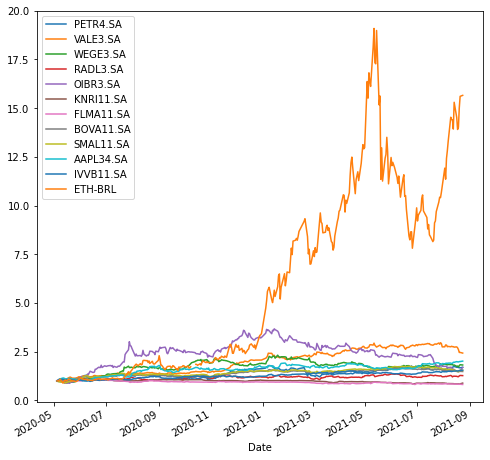

In [11]:
normalizado.plot(figsize = (8,8));

## 3. Simulação de uma carteira fictícia

Criando um dicionário com as alocações que vamos fazer para cada ativo na nossa carteira

In [12]:
compras = {'PETR4.SA': 1000, 'VALE3.SA': 700, 'WEGE3.SA': 1500, 
           'RADL3.SA': 700, 'OIBR3.SA': 200, 'KNRI11.SA': 700, 'FLMA11.SA': 700, 'BOVA11.SA':1500,
           'SMAL11.SA': 1500, 'AAPL34.SA': 2000, 'IVVB11.SA': 1500, 
           'ETH-BRL': 200}
           
compras_df = pd.Series(data=compras, index=list(compras.keys()))

Qual o valor total da nossa carteira?

In [13]:
sum(compras.values())

12200

Obtendo preços dos ativos no primeiro dia do investimento

In [14]:
primeiro = precos.iloc[0]

Quantidade de papéis comprados de cada ativo

In [16]:
qtd_acoes = compras_df/primeiro

Criando um dataframe que contém a posição diária de cada ativo

In [17]:
PL = precos*qtd_acoes

In [18]:
PL.head(3)

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000
2020-05-05,1032.221036,696.335095,1468.749815,696.987331,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.369090,1526.950431,200.962154
2020-05-06,994.246392,706.373804,1461.973138,693.037478,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167589,1548.315577,199.662245


In [19]:
PL.tail()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL
Date,,,,,,,,,,,,
2021-08-17,1703.360041,1892.935895,2648.266354,855.407388,299.999991,594.955233,586.283011,2234.231289,2217.361714,3962.566078,2256.649004,2781.549609
2021-08-18,1688.235882,1829.425369,2563.528252,852.039629,297.058818,595.134300,581.132075,2208.804201,2220.259080,3953.062200,2273.936211,2804.717612
2021-08-19,1678.783178,1725.048420,2686.437003,883.022892,299.999991,587.659883,583.333333,2224.375836,2275.309569,3985.575125,2308.422157,3002.797046
2021-08-20,1676.262545,1725.756132,2746.746320,898.177773,305.882339,596.566489,582.496845,2240.144622,2316.384508,3993.578089,2303.102954,3121.606584
2021-08-23,1702.729852,1701.873159,2729.187886,892.452603,338.235284,623.196980,573.867951,2228.318107,2316.213906,4037.095425,2332.358166,3131.866252


Criando uma coluna que contém a posição consolidada da nossa carteira diariamente

In [20]:
PL['PL Total'] = PL.iloc[:].sum(axis = 1)

In [21]:
PL.head()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,
2020-05-04,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000,12200.000000
2020-05-05,1032.221036,696.335095,1468.749815,696.987331,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.369090,1526.950431,200.962154,12317.815595
2020-05-06,994.246392,706.373804,1461.973138,693.037478,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167589,1548.315577,199.662245,12376.622632
2020-05-07,1003.452393,733.781033,1471.762221,694.175587,197.058826,716.112560,748.427673,1486.202425,1431.655459,2199.999886,1622.340455,212.823946,12517.792465
2020-05-08,1063.291135,778.397436,1439.759299,700.803383,202.941174,727.301819,726.415094,1526.215543,1433.359785,2220.108617,1602.393646,217.769114,12638.756042


In [22]:
PL.tail()

,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,
2021-08-17,1703.360041,1892.935895,2648.266354,855.407388,299.999991,594.955233,586.283011,2234.231289,2217.361714,3962.566078,2256.649004,2781.549609,22033.565605
2021-08-18,1688.235882,1829.425369,2563.528252,852.039629,297.058818,595.134300,581.132075,2208.804201,2220.259080,3953.062200,2273.936211,2804.717612,21867.333629
2021-08-19,1678.783178,1725.048420,2686.437003,883.022892,299.999991,587.659883,583.333333,2224.375836,2275.309569,3985.575125,2308.422157,3002.797046,22240.764433
2021-08-20,1676.262545,1725.756132,2746.746320,898.177773,305.882339,596.566489,582.496845,2240.144622,2316.384508,3993.578089,2303.102954,3121.606584,22506.705199
2021-08-23,1702.729852,1701.873159,2729.187886,892.452603,338.235284,623.196980,573.867951,2228.318107,2316.213906,4037.095425,2332.358166,3131.866252,22607.395572


## 4. Obtendo dados do IBOV (ou outros benchmarks)

Obtendo dados do IBOV para comparar com a nossa carteira

In [23]:
ibov = yf.download('^BVSP', start = inicio, end = fim)

[*********************100%***********************]  1 of 1 completed


In [24]:
ibov.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-05-04,80501.0,80502.0,77640.0,78876.0,78876.0,8594200
2020-05-05,78887.0,81066.0,78886.0,79471.0,79471.0,9154700
2020-05-06,79473.0,79996.0,78056.0,79064.0,79064.0,9775900
2020-05-07,79072.0,80061.0,78061.0,78119.0,78119.0,13808900
2020-05-08,78152.0,80557.0,78152.0,80263.0,80263.0,10734400


In [25]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

In [26]:
ibov = ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1)

In [27]:
ibov

,IBOV
Date,
2020-05-04,78876.0
2020-05-05,79471.0
2020-05-06,79064.0
2020-05-07,78119.0
2020-05-08,80263.0
...,...
2021-08-17,117904.0
2021-08-18,116643.0
2021-08-19,117165.0


Verificando se o índice dos dataframes está no formato 'data'

In [28]:
ibov.index = pd.to_datetime(ibov.index)

In [29]:
PL.index = pd.to_datetime(PL.index)

Juntando tudo num dataframe só

In [30]:
novo_df = pd.merge(ibov, PL, how = 'inner', on = 'Date')

In [31]:
novo_df.head()

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,,
2020-05-04,78876.0,1000.000000,700.000000,1500.000000,700.000000,200.000000,700.000000,700.000000,1500.000000,1500.000000,2000.000000,1500.000000,200.000000,12200.000000
2020-05-05,79471.0,1032.221036,696.335095,1468.749815,696.987331,205.882347,702.685449,739.622642,1508.672847,1479.377360,2059.369090,1526.950431,200.962154,12317.815595
2020-05-06,79064.0,994.246392,706.373804,1461.973138,693.037478,205.882347,717.231486,748.427673,1501.971061,1462.333842,2137.167589,1548.315577,199.662245,12376.622632
2020-05-07,78119.0,1003.452393,733.781033,1471.762221,694.175587,197.058826,716.112560,748.427673,1486.202425,1431.655459,2199.999886,1622.340455,212.823946,12517.792465
2020-05-08,80263.0,1063.291135,778.397436,1439.759299,700.803383,202.941174,727.301819,726.415094,1526.215543,1433.359785,2220.108617,1602.393646,217.769114,12638.756042


Normalizando esse novo dataframe que contém o IBOV, todos os ativos e o PL da nossa carteira

In [32]:
PL_normalizado = novo_df/novo_df.iloc[0]

In [33]:
PL_normalizado.head()

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,,
2020-05-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-05-05,1.007543,1.032221,0.994764,0.979167,0.995696,1.029412,1.003836,1.056604,1.005782,0.986252,1.029685,1.017967,1.004811,1.009657
2020-05-06,1.002383,0.994246,1.009105,0.974649,0.990054,1.029412,1.024616,1.069182,1.001314,0.974889,1.068584,1.032210,0.998311,1.014477
2020-05-07,0.990403,1.003452,1.048259,0.981175,0.991679,0.985294,1.023018,1.069182,0.990802,0.954437,1.100000,1.081560,1.064120,1.026049
2020-05-08,1.017585,1.063291,1.111996,0.959840,1.001148,1.014706,1.039003,1.037736,1.017477,0.955573,1.110054,1.068262,1.088846,1.035964


In [34]:
PL_normalizado.tail()

,IBOV,PETR4.SA,VALE3.SA,WEGE3.SA,RADL3.SA,OIBR3.SA,KNRI11.SA,FLMA11.SA,BOVA11.SA,SMAL11.SA,AAPL34.SA,IVVB11.SA,ETH-BRL,PL Total
Date,,,,,,,,,,,,,,
2021-08-17,1.494802,1.703360,2.704194,1.765511,1.222011,1.500000,0.849936,0.837547,1.489488,1.478241,1.981283,1.504433,13.907748,1.806030
2021-08-18,1.478815,1.688236,2.613465,1.709019,1.217199,1.485294,0.850192,0.830189,1.472536,1.480173,1.976531,1.515957,14.023588,1.792404
2021-08-19,1.485433,1.678783,2.464355,1.790958,1.261461,1.500000,0.839514,0.833333,1.482917,1.516873,1.992788,1.538948,15.013985,1.823013
2021-08-20,1.496691,1.676263,2.465366,1.831164,1.283111,1.529412,0.852238,0.832138,1.493430,1.544256,1.996789,1.535402,15.608033,1.844812
2021-08-23,1.489325,1.702730,2.431247,1.819459,1.274932,1.691176,0.890281,0.819811,1.485545,1.544143,2.018548,1.554905,15.659331,1.853065


Plot da nossa carteira vs. o IBOV

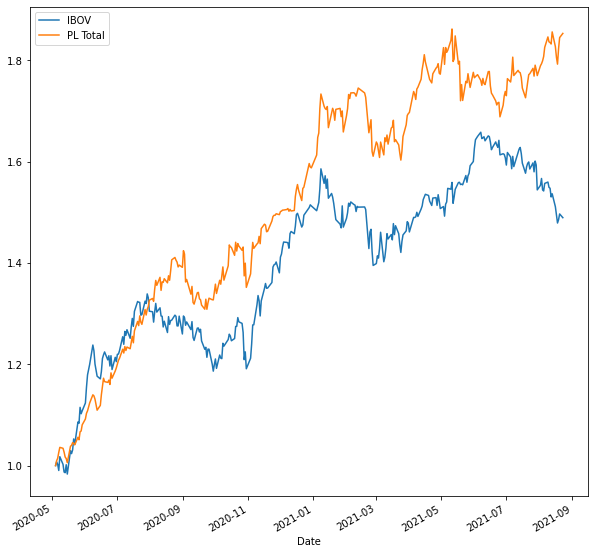

In [35]:
PL_normalizado[['IBOV', 'PL Total']].plot(figsize = (10,10));